Tenemos el objetivo de entender y predecir 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import pathlib

In [30]:
# load dataset
data_features = pd.read_csv(pathlib.Path().resolve() / "training_set_features.csv")
data_labels = pd.read_csv(pathlib.Path().resolve() / "training_set_labels.csv")

df = pd.merge(data_features, data_labels, on="respondent_id")
df


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [31]:
# Iniciamos analisis de datos
print("Cantidad de datos faltantes por columna:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


# Análisis de valores faltantes por columna
print("Distribución de valores en columnas con datos faltantes:")
for cols in missing_values[missing_values > 0].index:
    display(df[cols].value_counts(dropna=False, normalize=True).round(4))


Cantidad de datos faltantes por columna:


h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

Distribución de valores en columnas con datos faltantes:


h1n1_concern
2.0    0.3960
1.0    0.3053
3.0    0.1719
0.0    0.1234
NaN    0.0034
Name: proportion, dtype: float64

h1n1_knowledge
1.0    0.5466
2.0    0.3552
0.0    0.0938
NaN    0.0043
Name: proportion, dtype: float64

behavioral_antiviral_meds
0.0    0.9486
1.0    0.0487
NaN    0.0027
Name: proportion, dtype: float64

behavioral_avoidance
1.0    0.7200
0.0    0.2723
NaN    0.0078
Name: proportion, dtype: float64

behavioral_face_mask
0.0    0.9304
1.0    0.0689
NaN    0.0007
Name: proportion, dtype: float64

behavioral_wash_hands
1.0    0.8243
0.0    0.1741
NaN    0.0016
Name: proportion, dtype: float64

behavioral_large_gatherings
0.0    0.6393
1.0    0.3575
NaN    0.0033
Name: proportion, dtype: float64

behavioral_outside_home
0.0    0.6607
1.0    0.3363
NaN    0.0031
Name: proportion, dtype: float64

behavioral_touch_face
1.0    0.6740
0.0    0.3212
NaN    0.0048
Name: proportion, dtype: float64

doctor_recc_h1n1
0.0    0.7166
1.0    0.2025
NaN    0.0809
Name: proportion, dtype: float64

doctor_recc_seasonal
0.0    0.6161
1.0    0.3031
NaN    0.0809
Name: proportion, dtype: float64

chronic_med_condition
0.0    0.6907
1.0    0.2730
NaN    0.0364
Name: proportion, dtype: float64

child_under_6_months
0.0    0.8892
1.0    0.0801
NaN    0.0307
Name: proportion, dtype: float64

health_worker
0.0    0.8613
1.0    0.1085
NaN    0.0301
Name: proportion, dtype: float64

health_insurance
1.0    0.4754
NaN    0.4596
0.0    0.0650
Name: proportion, dtype: float64

opinion_h1n1_vacc_effective
4.0    0.4375
5.0    0.2683
3.0    0.1768
2.0    0.0696
1.0    0.0332
NaN    0.0146
Name: proportion, dtype: float64

opinion_h1n1_risk
2.0    0.3714
1.0    0.3048
4.0    0.2020
5.0    0.0655
3.0    0.0418
NaN    0.0145
Name: proportion, dtype: float64

opinion_h1n1_sick_from_vacc
2.0    0.3418
1.0    0.3369
4.0    0.2190
5.0    0.0819
NaN    0.0148
3.0    0.0055
Name: proportion, dtype: float64

opinion_seas_vacc_effective
4.0    0.4354
5.0    0.3734
2.0    0.0826
1.0    0.0457
3.0    0.0455
NaN    0.0173
Name: proportion, dtype: float64

opinion_seas_risk
2.0    0.3353
4.0    0.2857
1.0    0.2237
5.0    0.1108
3.0    0.0253
NaN    0.0192
Name: proportion, dtype: float64

opinion_seas_sick_from_vacc
1.0    0.4445
2.0    0.2858
4.0    0.1817
5.0    0.0644
NaN    0.0201
3.0    0.0035
Name: proportion, dtype: float64

education
College Graduate    0.3781
Some College        0.2637
12 Years            0.2171
< 12 Years          0.0885
NaN                 0.0527
Name: proportion, dtype: float64

income_poverty
<= $75,000, Above Poverty    0.4784
> $75,000                    0.2550
NaN                          0.1656
Below Poverty                0.1010
Name: proportion, dtype: float64

marital_status
Married        0.5075
Not Married    0.4397
NaN            0.0527
Name: proportion, dtype: float64

rent_or_own
Own     0.7015
Rent    0.2220
NaN     0.0765
Name: proportion, dtype: float64

employment_status
Employed              0.5077
Not in Labor Force    0.3831
NaN                   0.0548
Unemployed            0.0544
Name: proportion, dtype: float64

household_adults
1.0    0.5420
0.0    0.3016
2.0    0.1050
3.0    0.0421
NaN    0.0093
Name: proportion, dtype: float64

household_children
0.0    0.6991
1.0    0.1189
2.0    0.1072
3.0    0.0654
NaN    0.0093
Name: proportion, dtype: float64

employment_industry
NaN         0.4991
fcxhlnwr    0.0924
wxleyezf    0.0675
ldnlellj    0.0461
pxcmvdjn    0.0388
atmlpfrs    0.0347
arjwrbjb    0.0326
xicduogh    0.0319
mfikgejo    0.0230
vjjrobsf    0.0197
rucpziij    0.0196
xqicxuve    0.0191
saaquncn    0.0127
cfqqtusy    0.0122
nduyfdeo    0.0107
mcubkhph    0.0103
wlfvacwt    0.0081
dotnnunm    0.0075
haxffmxo    0.0055
msuufmds    0.0046
phxvnwax    0.0033
qnlwzans    0.0005
Name: proportion, dtype: float64

employment_occupation
NaN         0.5044
xtkaffoo    0.0666
mxkfnird    0.0565
emcorrxb    0.0476
cmhcxjea    0.0467
xgwztkwe    0.0405
hfxkjkmi    0.0287
qxajmpny    0.0205
xqwwgdyp    0.0182
kldqjyjy    0.0176
uqqtjvyb    0.0169
tfqavkke    0.0145
ukymxvdu    0.0139
vlluhbov    0.0133
oijqvulv    0.0129
ccgxvspp    0.0128
bxpfxfdn    0.0124
haliazsg    0.0111
rcertsgn    0.0103
xzmlyyjv    0.0093
dlvbwzss    0.0085
hodpvpew    0.0078
dcjcmpih    0.0055
pvmttkik    0.0037
Name: proportion, dtype: float64

In [32]:
# vemos la distrubucion de las variables objetivo
display(df["h1n1_vaccine"].value_counts(dropna=False, normalize=True).round(4))
display(df["seasonal_vaccine"].value_counts(dropna=False, normalize=True).round(4))

h1n1_vaccine
0    0.7875
1    0.2125
Name: proportion, dtype: float64

seasonal_vaccine
0    0.5344
1    0.4656
Name: proportion, dtype: float64

In [33]:
display(df.describe(include='all'))

display(df.info())

# buscamos las cols especificamente objects
object_cols = df.select_dtypes(include=['object']).columns
print("Columnas de tipo object:")
print(object_cols)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

None

Columnas de tipo object:
Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')


In [34]:
# Primero separamos las variables objetivo y respondent_id ANTES de imputar
X_raw = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine", "respondent_id"])
y = df[["h1n1_vaccine", "seasonal_vaccine"]]

# Imputación para variables numéricas (mediana)
num_cols = X_raw.select_dtypes(include=["number"]).columns
imputer_num = SimpleImputer(strategy="median")
X_raw[num_cols] = imputer_num.fit_transform(X_raw[num_cols])

# Imputación para variables categóricas (moda)
cat_cols = X_raw.select_dtypes(include=["object"]).columns
imputer_cat = SimpleImputer(strategy="most_frequent")
X_raw[cat_cols] = imputer_cat.fit_transform(X_raw[cat_cols])

# Verificamos que no queden valores faltantes
print("Valores faltantes después de imputar:")
display(X_raw.isnull().sum()[X_raw.isnull().sum() > 0])

# Guardamos en df para continuar con el flujo
df = pd.concat([X_raw, y, df[["respondent_id"]]], axis=1)


Valores faltantes después de imputar:


Series([], dtype: int64)

In [35]:
# Trabajamos solo con las features (sin variables objetivo ni respondent_id)
X_encoded = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine", "respondent_id"])

# Definir columnas para cada tipo de codificación
ordinal_cols = ['age_group', 'education', 'income_poverty']
onehot_cols = [
    'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status',
    'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'
]

# Codificar variables ordinales
ordinal_encoder = OrdinalEncoder()
X_encoded[ordinal_cols] = ordinal_encoder.fit_transform(X_encoded[ordinal_cols])

# Codificar variables categóricas sin orden (OneHotEncoder)
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(X_encoded[onehot_cols])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_cols), index=X_encoded.index)

# Unir al DataFrame original y eliminar las columnas originales
X_encoded = X_encoded.drop(columns=onehot_cols)
X_encoded = pd.concat([X_encoded, onehot_df], axis=1)

# Actualizar df con las features codificadas
df = pd.concat([X_encoded, y, df[["respondent_id"]]], axis=1)


In [36]:
# vemos grado de correlacion con variables objetivo
correlation_h1n1 = df.corr()["h1n1_vaccine"].sort_values(ascending=False).round(4)
correlation_seasonal = df.corr()["seasonal_vaccine"].sort_values(ascending=False).round(4)
print("Correlación con h1n1_vaccine:")
display(correlation_h1n1)
print("Correlación con seasonal_vaccine:")
display(correlation_seasonal)

Correlación con h1n1_vaccine:


h1n1_vaccine                      1.0000
doctor_recc_h1n1                  0.3941
seasonal_vaccine                  0.3771
opinion_h1n1_risk                 0.3206
opinion_h1n1_vacc_effective       0.2674
                                   ...  
employment_occupation_qxajmpny   -0.0371
employment_industry_xicduogh     -0.0395
employment_occupation_xgwztkwe   -0.0399
marital_status_Not Married       -0.0452
race_Black                       -0.0457
Name: h1n1_vaccine, Length: 99, dtype: float64

Correlación con seasonal_vaccine:


seasonal_vaccine                1.0000
opinion_seas_risk               0.3869
h1n1_vaccine                    0.3771
doctor_recc_seasonal            0.3607
opinion_seas_vacc_effective     0.3589
                                 ...  
employment_status_Unemployed   -0.0786
employment_industry_xicduogh   -0.0817
rent_or_own_Rent               -0.1018
employment_status_Employed     -0.1070
household_children             -0.1117
Name: seasonal_vaccine, Length: 99, dtype: float64

In [37]:
# Comenzamos a separar las variables objetivo y las features
X = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine", "respondent_id"])
y = df[["h1n1_vaccine", "seasonal_vaccine"]]

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y, shuffle=True)

In [38]:
# aplicamos estandarizacion
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [39]:
# Probamos mediante RandomForestClassifier
base_model_rfc = RandomForestClassifier(random_state=42)
multi_model_rfc = MultiOutputClassifier(base_model_rfc)
multi_model_rfc.fit(X_train, y_train)

# creamos variable proba del modelo
y_pred_rfc = multi_model_rfc.predict_proba(X_test)

# usamos roc_auc_score para evaluar
y_pred_h1n1_rfc = y_pred_rfc[0][:, 1] 
y_pred_seasonal_rfc = y_pred_rfc[1][:, 1]
y_pred = pd.DataFrame({
    "h1n1_vaccine": y_pred_h1n1_rfc,
    "seasonal_vaccine": y_pred_seasonal_rfc
}, index=y_test.index)
print(f'El ROC AUC Score es: {roc_auc_score(y_test, y_pred):.4f}')
display(y_pred_rfc)


El ROC AUC Score es: 0.8393


[array([[0.9 , 0.1 ],
        [0.26, 0.74],
        [0.98, 0.02],
        ...,
        [0.31, 0.69],
        [0.95, 0.05],
        [0.7 , 0.3 ]], shape=(8814, 2)),
 array([[0.86, 0.14],
        [0.07, 0.93],
        [0.77, 0.23],
        ...,
        [0.21, 0.79],
        [0.5 , 0.5 ],
        [0.61, 0.39]], shape=(8814, 2))]

El ROC AUC de 0.8393 implica que el modelo tiene una buena capacidad para distinguir entre las clases positivas y negativas para la vacuna H1N1. Un valor cercano a 1 indica un excelente rendimiento, mientras que un valor cercano a 0.5 sugiere un rendimiento similar al azar. Por lo tanto, un ROC AUC de 0.8393 sugiere que el modelo es bastante efectivo para predecir la vacunación contra H1N1 en este conjunto de datos.



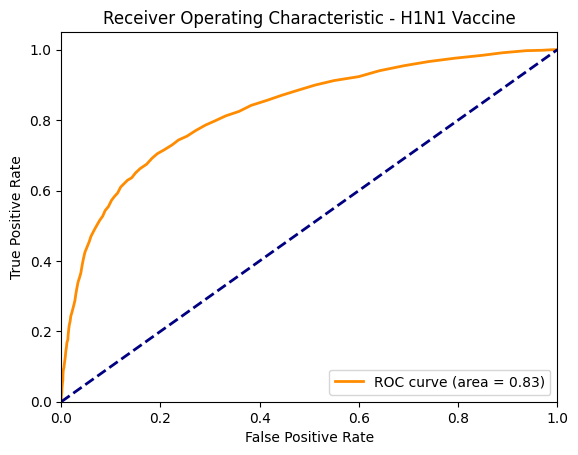

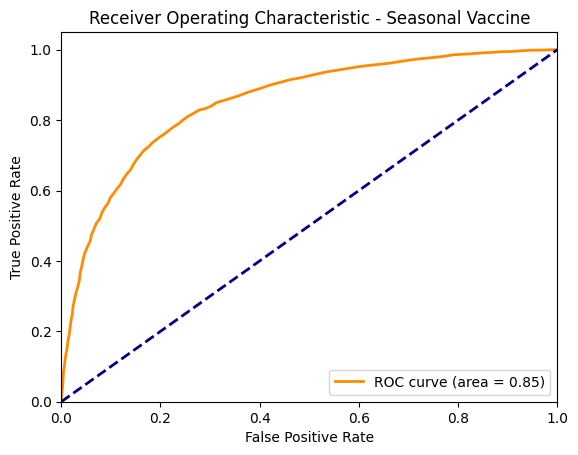

In [40]:
# CURVA ROC AUC para H1N1 Vaccine
from sklearn.metrics import roc_curve, auc
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test["h1n1_vaccine"], y_pred_h1n1_rfc)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
plt.figure()

plt.plot(fpr_h1n1, tpr_h1n1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - H1N1 Vaccine')
plt.legend(loc="lower right")
plt.show()

# CURVA ROC AUC para Seasonal Vaccine
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test["seasonal_vaccine"], y_pred_seasonal_rfc)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)
plt.figure()
plt.plot(fpr_seasonal, tpr_seasonal, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')   
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Seasonal Vaccine')
plt.legend(loc="lower right")
plt.show()


In [41]:
# Preparamos el conjunto de testeo usando los transformadores YA ENTRENADOS
test_features = pd.read_csv(pathlib.Path().resolve() / "test_set_features.csv", index_col="respondent_id")

# Imputación usando los imputers ya entrenados (transform, no fit_transform)
test_features[num_cols] = imputer_num.transform(test_features[num_cols])
test_features[cat_cols] = imputer_cat.transform(test_features[cat_cols])

# Verificamos que no queden valores faltantes
print("Valores faltantes después de imputar en test:")
display(test_features.isnull().sum()[test_features.isnull().sum() > 0])

# Codificar variables ordinales usando el encoder ya entrenado
test_features[ordinal_cols] = ordinal_encoder.transform(test_features[ordinal_cols])

# Codificar variables categóricas usando el encoder ya entrenado
onehot_encoded = onehot_encoder.transform(test_features[onehot_cols])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_cols), index=test_features.index)

# Unir al DataFrame original y eliminar las columnas originales
test_features = test_features.drop(columns=onehot_cols)
test_features = pd.concat([test_features, onehot_df], axis=1)


Valores faltantes después de imputar en test:


Series([], dtype: int64)

In [42]:
# Estandarizar test_features usando el scaler ya entrenado
test_features_scaled = scaler.transform(test_features)

# Predecir con el modelo entrenado
test_proba = multi_model_rfc.predict_proba(test_features_scaled)
test_proba


[array([[0.9 , 0.1 ],
        [0.93, 0.07],
        [0.46, 0.54],
        ...,
        [0.9 , 0.1 ],
        [0.92, 0.08],
        [0.61, 0.39]], shape=(26708, 2)),
 array([[0.69, 0.31],
        [0.95, 0.05],
        [0.23, 0.77],
        ...,
        [0.62, 0.38],
        [0.57, 0.43],
        [0.3 , 0.7 ]], shape=(26708, 2))]

In [43]:
submission_df = pd.DataFrame(index=test_features.index)

# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, submission_df.index.values)

submission_df['h1n1_vaccine'] = test_proba[0][:, 1]
submission_df['seasonal_vaccine'] = test_proba[1][:, 1]
submission_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.10,0.31
26708,0.07,0.05
26709,0.54,0.77
26710,0.49,0.86
26711,0.21,0.42
...,...,...
53410,0.33,0.54
53411,0.31,0.32
53412,0.10,0.38


In [44]:
submission_df.to_csv('submission.csv', index=True)